In [62]:
import pandas as pd
from time import sleep
from tqdm import tqdm
import matplotlib.pyplot as plt

from greviews import get_review_topics

In [35]:
from importlib import reload  
import greviews
reload(greviews)

<module 'greviews' from '/Users/chengqiu/PycharmProjects/philly_outdoors/google_review/greviews.py'>

In [7]:
# get park info

# import sys
# sys.path.append("../")
from utility import get_info, find_city_level_address

info_to_concat = []
info_list = ['../philly_parks_info.db', '../philly_state_parks_info.db', '../nyc_parks_info.db']
for info_db in info_list:
    df = get_info(info_db)
    info_to_concat.append(df)
    
info_df = pd.concat(info_to_concat, axis=0)

info_df.reset_index(drop=True, inplace=True)
info_df.shape

(4614, 5)

In [8]:
# example
topics = get_review_topics("ChIJAWkAqNL1t4kRlm4slspOSXo")
[(t['name'], t['contribution_stats']['num_reviews']) for t in topics]

[('beach', 79),
 ('rentals', 44),
 ('kayak', 30),
 ('pavilions', 28),
 ('wedding', 28),
 ('ice rink', 23),
 ('paved', 22),
 ('concerts', 18),
 ('visitor center', 10),
 ('county', 8)]

In [45]:
def get_google_review_tags(google_place_id):
    sleep(.5)
    try:
        topics = get_review_topics(google_place_id)
        tags = [t['name'] for t in topics]
        counts = [t['contribution_stats']['num_reviews'] for t in topics]
    except:
        print(google_place_id)
        tags = []
        counts = []
        
    return tags, counts

In [49]:
get_google_review_tags('ChIJP75lm3n2t4kRVKf9vxXsiIc')#'ChIJ8z9HqlykxYkRiLgB6-ajgao')

(['prices',
  'customer',
  'sale',
  'employee',
  'business',
  'propane',
  'screw',
  'delivery',
  'stock',
  'big box'],
 [9, 6, 4, 4, 4, 3, 3, 3, 3, 3])

In [54]:
google_review_tag = []
for id in tqdm(info_df['id']):
    google_review_tag.append(get_google_review_tags(id))
    

100%|██████████| 4614/4614 [1:55:53<00:00,  1.51s/it]  


In [47]:
# info_df[['review_tag', 'review_tag_count']] = info_df['id'].apply(get_google_review_tags)

In [69]:
review_tag, review_tag_count = zip(*google_review_tag)

'review_tag_count' can be used to evaluate reliability of 'review_tag' - 

such that the super rarely mentioned tag may not be a meaningful tag, although it's rare across all tags


In [73]:
# insert review tag to the info table
info_df['review_tag'] = review_tag
info_df['review_tag_count'] = review_tag_count


In [74]:
info_df.head()

,id,name,lat,lng,address,review_tag,review_tag_count
0,ChIJAWkAqNL1t4kRlm4slspOSXo,Quiet Waters Park,38.937670,-76.500899,"600 Quiet Waters Park Rd, Annapolis, MD 21403,...","[beach, rentals, kayak, pavilions, wedding, ic...","[79, 44, 30, 28, 28, 23, 22, 18, 10, 8]"
1,ChIJzcow6Xb1t4kRQVE7s1AWWr8,Hillsmere Shores Community Beach,38.927212,-76.494150,"101 W Bay View Dr, Annapolis, MD 21403, USA",[],[]
2,ChIJ_bk5K1z1t4kRQNverIUOVko,Quiet Waters Dog Beach,38.930202,-76.508341,"1701-1799 Quiet Waters Park Rd, Annapolis, MD ...","[walk, swim, area, fee, trails, clean, leash, ...","[15, 9, 9, 7, 6, 5, 5, 4, 3, 3]"
3,ChIJ_-2cQEX1t4kRoiCrmNMbrQ8,Quiet Waters Dog Park,38.931865,-76.505658,"600 Quiet Waters Park Rd, Annapolis, MD 21403,...","[beach, trails, summer, walking, shade, concer...","[10, 6, 5, 5, 4, 3, 3, 3]"
4,ChIJQWcsgIn2t4kRCL0Ub363FyI,Pip Moyer Recreation Center (Annapolis Recreat...,38.963271,-76.505150,"273 Hilltop Ln, Annapolis, MD 21403, USA","[clean, voting, gym, party, space, organized, ...","[8, 6, 6, 4, 3, 3, 3, 3, 3, 3]"


In [75]:
info_with_review_tag = info_df.copy()
info_with_review_tag.to_parquet('park_info_with_review_tag.parquet')


In [55]:
import dill

with open('park_info_with_review_tag.dill', 'wb') as f:
    dill.dump(google_review_tag, f)

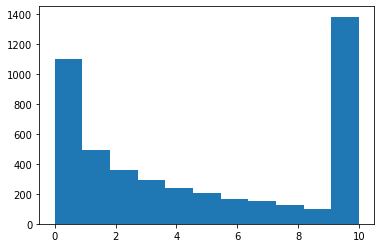

In [65]:
tag_count = [len(tags[0]) for tags in google_review_tag]
plt.hist(tag_count, 11); 

In [68]:
info_df[info_df['name']=='Timber Creek Dog Park']

,id,name,lat,lng,address
1332,ChIJv7qvtP3NxokRxuok-WUh3O0,Timber Creek Dog Park,39.831453,-75.058985,"236 Taylor Ave & Chews Landing Road, Blackwood..."
